In [1]:
import torch
from matplotlib import pyplot as plt

import dataset
from src_block import src_block

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cpu


In [23]:
train_ds = dataset.train()
train_ds = torch.tensor(train_ds, device=device)
train_ds.shape

torch.Size([100, 14, 40, 30])

In [24]:
test_ds = dataset.test()
test_ds = torch.tensor(test_ds, device=device)
test_ds.shape

torch.Size([100, 12, 40, 30])

In [25]:
def split4(x: torch.Tensor):
    row_p = [0, 15, 30]
    col_p = [0, 10, 20, 30, 40]

    res = []
    for j in range(len(col_p)-1):
        for i in range(len(row_p)-1):
            m = x[:, :, col_p[j]:col_p[j + 1], row_p[i]:row_p[i + 1]]
            res.append(m)
    return torch.stack(res)


train_ds = split4(train_ds)
test_ds = split4(test_ds)

In [26]:
y = test_ds[:, 0, 0, :, :]
y.shape

torch.Size([8, 10, 15])

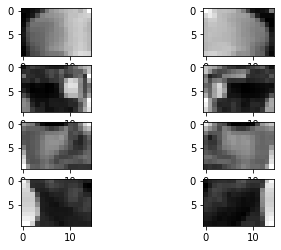

In [27]:
plt.figure()
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.imshow(y[i, :, :],cmap='gray')

plt.show()

In [7]:
accu, hist = src_block(train_ds, test_ds, k=1, device=device)

  0%|          | 0/100 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
accu

In [ ]:
plt.plot(hist)